In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("results.csv")

In [2]:
data.head()

,Unnamed: 0,time_this_iter_s,should_checkpoint,done,timesteps_total,episodes_total,training_iteration,trial_id,experiment_id,date,...,config/data_dir,config/delta,config/first_channels,config/lr,config/max_channels,config/n_convs,config/n_depthwise,config/num_epochs,config/upsampling_mode,logdir
0,0,358.456182,True,True,NaN,NaN,3,2a2d561f,380866090dd94c1fa9a0ff7a8797de9d,2023-03-23_21-05-50,...,/home/roybatti/Desktop/tiktoks/tiktoksteg/data,0.500000,64,0.001000,512,5,4,30,nearest,/home/roybatti/ray_results/train_2023-03-23_20...
1,1,338.004148,True,True,NaN,NaN,1,939f09e4,380866090dd94c1fa9a0ff7a8797de9d,2023-03-23_21-11-29,...,/home/roybatti/Desktop/tiktoks/tiktoksteg/data,0.263888,64,0.000015,1024,6,4,30,nearest,/home/roybatti/ray_results/train_2023-03-23_20...
2,2,364.819822,True,True,NaN,NaN,1,f93f9f72,380866090dd94c1fa9a0ff7a8797de9d,2023-03-23_21-17-33,...,/home/roybatti/Desktop/tiktoks/tiktoksteg/data,0.203944,64,0.001535,1024,3,4,30,bilinear,/home/roybatti/ray_results/train_2023-03-23_20...
3,3,18580.012204,True,True,NaN,NaN,1,26fa2f22,380866090dd94c1fa9a0ff7a8797de9d,2023-03-24_02-27-13,...,/home/roybatti/Desktop/tiktoks/tiktoksteg/data,0.962179,32,0.000002,2048,7,2,30,bicubic,/home/roybatti/ray_results/train_2023-03-23_20...
4,4,323.067938,True,True,NaN,NaN,1,8da543a4,380866090dd94c1fa9a0ff7a8797de9d,2023-03-24_02-32-36,...,/home/roybatti/Desktop/tiktoks/tiktoksteg/data,0.183419,64,0.000003,512,2,2,30,nearest,/home/roybatti/ray_results/train_2023-03-23_20...


In [4]:
data.columns

Index(['Unnamed: 0', 'time_this_iter_s', 'should_checkpoint', 'done',
       'timesteps_total', 'episodes_total', 'training_iteration', 'trial_id',
       'experiment_id', 'date', 'timestamp', 'time_total_s', 'pid', 'hostname',
       'node_ip', 'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'warmup_time', '_metric/h_train_loss',
       '_metric/r_train_loss', '_metric/sum_train_loss', '_metric/h_val_loss',
       '_metric/r_val_loss', '_metric/sum_val_loss', '_metric/total_params',
       '_metric/weighted_val_loss', 'config/adam_beta', 'config/batch_size',
       'config/beta', 'config/checkpoint_dir', 'config/data_dir',
       'config/delta', 'config/first_channels', 'config/lr',
       'config/max_channels', 'config/n_convs', 'config/n_depthwise',
       'config/num_epochs', 'config/upsampling_mode', 'logdir'],
      dtype='object')

In [5]:
data = data.sort_values('_metric/weighted_val_loss')

In [14]:
# survivorship bias - only looking at ones that were successful and running bc of compute
data.iloc[0]

Unnamed: 0                                                                  66
time_this_iter_s                                                    230.825274
should_checkpoint                                                         True
done                                                                      True
timesteps_total                                                            NaN
episodes_total                                                             NaN
training_iteration                                                           3
trial_id                                                              fc8ef7ea
experiment_id                                 45d8fb860e65444c864de8acadfb8435
date                                                       2023-03-26_17-36-07
timestamp                                                           1679866567
time_total_s                                                        692.921683
pid                                                 

Text(0.5, 1.0, 'Scatterplot of x and y: Pearson rho =  0.976')

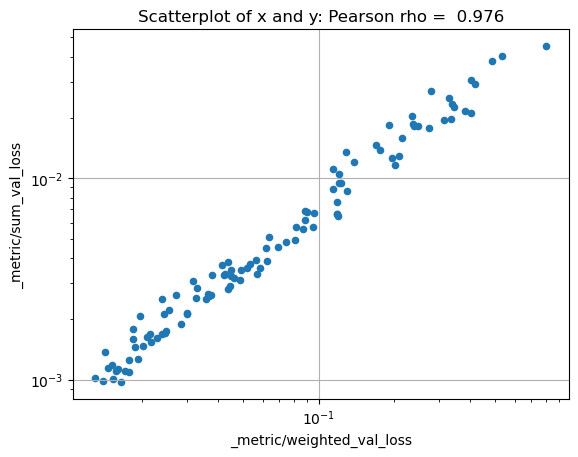

In [39]:
data.plot.scatter('_metric/weighted_val_loss', '_metric/sum_val_loss')
plt.xscale('log')
plt.yscale('log')
corr = data['_metric/weighted_val_loss'].corr(data['_metric/sum_val_loss'])
plt.title(f"Scatterplot of x and y: Pearson rho = {corr: .3f}")

# Ensures that weighted loss is in fact a comparable metric with sum val 

<Axes: ylabel='Frequency'>

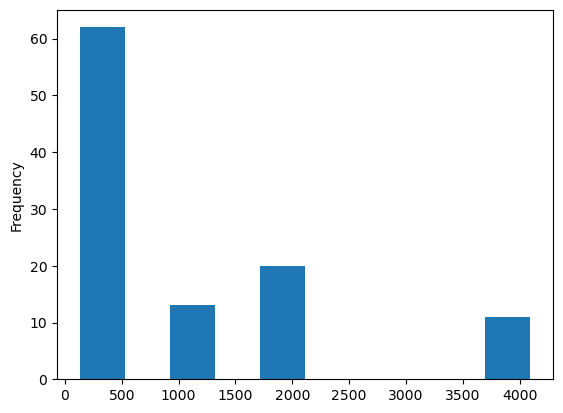

In [20]:
data['config/max_channels'].plot.hist()

<Axes: ylabel='Frequency'>

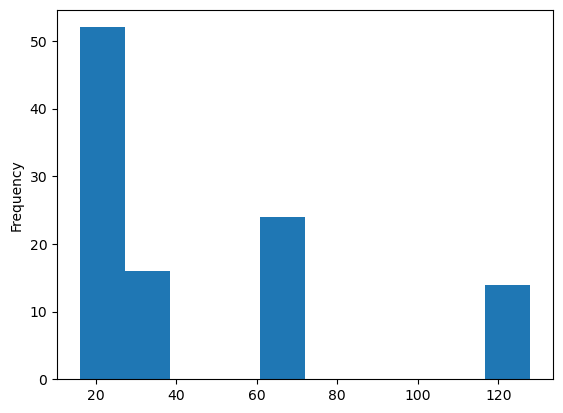

In [21]:
data['config/first_channels'].plot.hist()

In [24]:
data['config/first_channels'].corr(data['config/max_channels'])

0.09231868248653259

<Axes: ylabel='Frequency'>

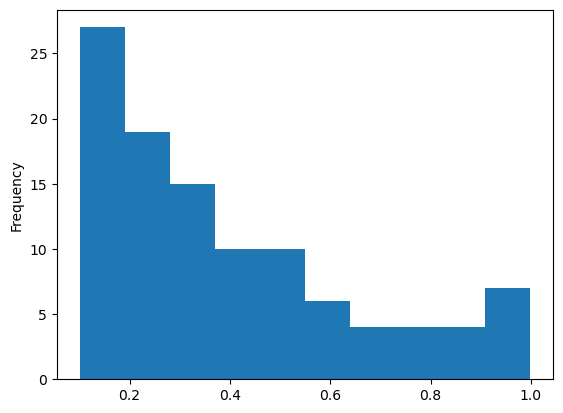

In [25]:
data['config/delta'].plot.hist()

In [27]:
# Since deltas skew low, this means we just need to do the L1 (absolute loss) as opposed to a combination of L1 and L2 (huber loss)


(array([ 6.,  2.,  7.,  8., 11., 15., 20., 16., 13.,  8.]),
 array([-13.58120086, -12.68361053, -11.78602019, -10.88842986,
         -9.99083952,  -9.09324919,  -8.19565885,  -7.29806852,
         -6.40047819,  -5.50288785,  -4.60529752]),
 <BarContainer object of 10 artists>)

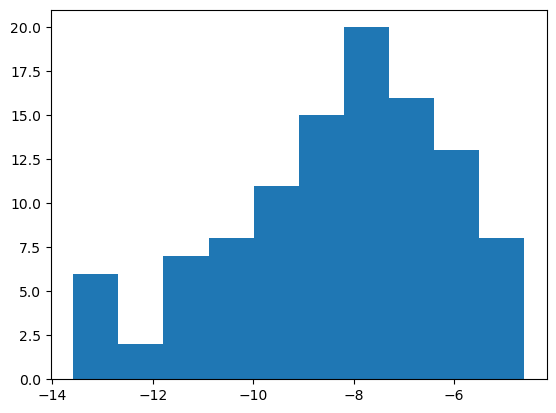

In [30]:
plt.hist(np.log(data['config/lr']))

<Axes: ylabel='Frequency'>

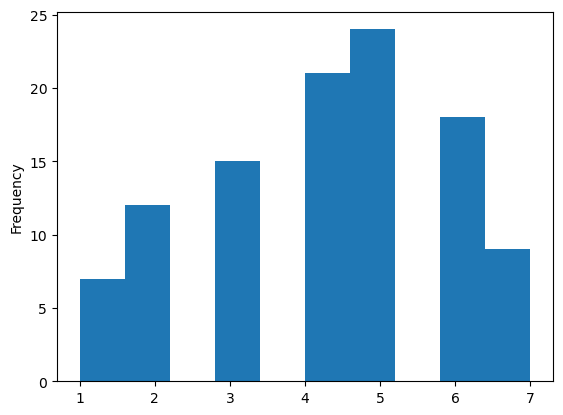

In [32]:
data['config/n_convs'].plot.hist()

(array([63.,  0.,  0.,  0.,  0., 17.,  0.,  0.,  0., 26.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

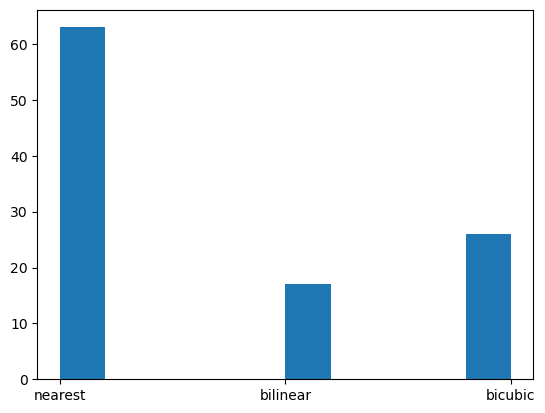

In [36]:
plt.hist(data['config/upsampling_mode'])